# Opiate Data by Abby Zweifach, Morgan Sizemore and Aly Berger

In [41]:
import pandas as pd
import numpy as np
import plotly_express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly as py
from scipy.stats import pearsonr
import hypertools as hyp

## Importing the data

In [42]:
opioid_names = pd.read_csv('opioids.csv')  #list of opioids
overdoses = pd.read_csv('overdoses.csv') #list of overdoses
prescriptions = pd.read_csv('prescriber-info.csv') #prescriptions by individual prescriber
prescriptions.head()

,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,1710982582,M,TX,DDS,Dentist,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1245278100,F,AL,MD,General Surgery,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,1
2,1427182161,F,NY,M.D.,General Practice,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,0
3,1669567541,M,AZ,MD,Internal Medicine,0,43,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1679650949,M,NV,M.D.,Hematology/Oncology,0,0,0,0,0,...,0,0,0,0,17,28,0,0,0,1


In [43]:
prescriptions1=prescriptions.set_index(['NPI'])
prescriptions1.head()

,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
NPI,,,,,,,,,,,,,,,,,,,,,
1710982582,M,TX,DDS,Dentist,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1245278100,F,AL,MD,General Surgery,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,1
1427182161,F,NY,M.D.,General Practice,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,0
1669567541,M,AZ,MD,Internal Medicine,0,43,0,0,0,21,...,0,0,0,0,0,0,0,0,0,1
1679650949,M,NV,M.D.,Hematology/Oncology,0,0,0,0,0,0,...,0,0,0,0,17,28,0,0,0,1


## Prescriber Information

In [44]:
prescriptions1.shape

(25000, 255)

In [45]:
#14,688/25,000 Prescribers who prescribed opiate drugs more than 10 times in the year (2014)
repeats = prescriptions1.loc[prescriptions1['Opioid.Prescriber'] != 0]
repeats.head()

,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
NPI,,,,,,,,,,,,,,,,,,,,,
1710982582,M,TX,DDS,Dentist,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1245278100,F,AL,MD,General Surgery,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,1
1669567541,M,AZ,MD,Internal Medicine,0,43,0,0,0,21,...,0,0,0,0,0,0,0,0,0,1
1679650949,M,NV,M.D.,Hematology/Oncology,0,0,0,0,0,0,...,0,0,0,0,17,28,0,0,0,1
1548580897,M,PA,DO,General Surgery,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
repeats.shape

(14688, 255)

In [47]:
labels1 = ['More than 10 times','Less than 10 times']
values1 = [14688,10312]

trace = go.Pie(labels=labels1, values=values1)

py.offline.plot([trace], filename='prescribers_pie_chart')

/optnfs/el7/jupyterhub/envs/Psych81.09/lib/python3.6/site-packages/plotly/offline/offline.py:654: UserWarning:

Your filename `prescribers_pie_chart` didn't end with .html. Adding .html to the end of your file.



'file:///dartfs/rc/lab/P/Psych81.09/course/abbyzweifach/storytelling-with-data/data-stories/us-opiate-data/prescribers_pie_chart.html'

In [48]:
repeats.sort_values('Gender', ascending = True).head()

,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
NPI,,,,,,,,,,,,,,,,,,,,,
1023116514,F,IN,M.D.,Family Practice,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1902071640,F,MA,NaN,Geriatric Medicine,0,0,12,21,0,49,...,0,0,14,0,31,0,0,0,0,1
1740242023,F,GA,M.D.,Family Practice,0,0,0,28,0,0,...,0,0,0,0,0,0,0,24,45,1
1649436122,F,AL,M.D,Internal Medicine,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1730150764,F,NY,MD,Medical Oncology,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,14,1


In [49]:
repeats[repeats.Gender != 'M'].head()

,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
NPI,,,,,,,,,,,,,,,,,,,,,
1245278100,F,AL,MD,General Surgery,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,1
1821106832,F,WI,MD,Internal Medicine,0,0,0,11,0,15,...,0,0,0,0,56,0,20,0,0,1
1609931914,F,PR,M.D.,General Practice,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1952598419,F,TX,MD,Hematology/Oncology,0,0,16,0,0,0,...,0,0,0,0,40,54,0,0,12,1
1598748931,F,AL,M.D.,Family Practice,0,0,0,20,0,68,...,0,0,0,0,27,13,22,0,57,1


In [50]:
labels = ['Male','Female']
values = [9553,5135]

trace = go.Pie(labels=labels, values=values)

py.offline.plot([trace], filename='gender_pie_chart')

/optnfs/el7/jupyterhub/envs/Psych81.09/lib/python3.6/site-packages/plotly/offline/offline.py:654: UserWarning:

Your filename `gender_pie_chart` didn't end with .html. Adding .html to the end of your file.



'file:///dartfs/rc/lab/P/Psych81.09/course/abbyzweifach/storytelling-with-data/data-stories/us-opiate-data/gender_pie_chart.html'

## Analysis by State

### Prescriptions

In [51]:
#Average number of prescriptions by state and medication
prescriptions_by_state = prescriptions1.groupby('State').aggregate(np.mean)
prescriptions_by_state.head()

,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,AMIODARONE.HCL,AMITRIPTYLINE.HCL,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
State,,,,,,,,,,,,,,,,,,,,,
AA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AE,0.000000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.500000,1.000000
AK,0.282051,0.282051,0.000000,1.794872,1.179487,2.230769,0.923077,2.307692,0.000000,1.102564,...,0.282051,0.333333,0.743590,0.000000,4.153846,0.410256,0.769231,2.846154,3.487179,0.692308
AL,3.002907,2.674419,1.921512,9.694767,1.148256,9.601744,19.424419,35.883721,5.892442,9.930233,...,5.398256,3.476744,3.264535,2.034884,27.255814,9.226744,8.677326,0.930233,22.186047,0.709302
AR,6.356481,2.685185,1.504630,6.444444,1.291667,8.421296,12.217593,23.402778,3.898148,9.597222,...,2.851852,5.032407,1.736111,1.097222,23.444444,3.574074,5.324074,1.949074,17.333333,0.736111


In [52]:
#Average number of total prescriptions by state
avg_prescriptions = prescriptions_by_state.mean(axis=1)

In [53]:
prescriptions_by_state2 = prescriptions_by_state.copy().drop(['Opioid.Prescriber'], axis=1)
prescriptions_by_state2['Average'] = avg_prescriptions.tolist()
prescriptions_by_state2.head()

,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,AMIODARONE.HCL,AMITRIPTYLINE.HCL,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Average
State,,,,,,,,,,,,,,,,,,,,,
AA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.063745
AE,0.000000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.500000,3.543825
AK,0.282051,0.282051,0.000000,1.794872,1.179487,2.230769,0.923077,2.307692,0.000000,1.102564,...,0.282051,0.333333,0.743590,0.000000,4.153846,0.410256,0.769231,2.846154,3.487179,1.638267
AL,3.002907,2.674419,1.921512,9.694767,1.148256,9.601744,19.424419,35.883721,5.892442,9.930233,...,5.398256,3.476744,3.264535,2.034884,27.255814,9.226744,8.677326,0.930233,22.186047,10.556310
AR,6.356481,2.685185,1.504630,6.444444,1.291667,8.421296,12.217593,23.402778,3.898148,9.597222,...,2.851852,5.032407,1.736111,1.097222,23.444444,3.574074,5.324074,1.949074,17.333333,7.993065


In [54]:
#Highest prescribing states
prescriptions_by_state2.sort_values(['Average'], ascending=False).head()

,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,AMIODARONE.HCL,AMITRIPTYLINE.HCL,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Average
State,,,,,,,,,,,,,,,,,,,,,
PR,2.134199,3.316017,0.341991,3.774892,0.489177,25.835498,11.709957,21.692641,1.761905,7.051948,...,17.670996,0.000000,4.467532,2.636364,10.735931,4.255411,6.034632,0.549784,31.943723,10.665615
AL,3.002907,2.674419,1.921512,9.694767,1.148256,9.601744,19.424419,35.883721,5.892442,9.930233,...,5.398256,3.476744,3.264535,2.034884,27.255814,9.226744,8.677326,0.930233,22.186047,10.556310
MS,4.331606,1.735751,1.284974,5.901554,1.927461,9.595855,19.849741,20.481865,6.751295,7.367876,...,4.880829,4.082902,2.984456,1.564767,25.373057,3.031088,8.746114,0.735751,16.290155,9.004975
GA,2.409462,1.975530,1.422512,8.539967,1.619902,8.244698,15.712887,22.433931,3.199021,7.132137,...,3.662316,2.287113,4.282219,1.011419,19.267537,3.884176,6.264274,1.980424,20.639478,8.177853
AR,6.356481,2.685185,1.504630,6.444444,1.291667,8.421296,12.217593,23.402778,3.898148,9.597222,...,2.851852,5.032407,1.736111,1.097222,23.444444,3.574074,5.324074,1.949074,17.333333,7.993065


In [55]:
#Choropleth map of the total number of prescriptions by state
x6 = prescriptions_by_state2.drop(['Average'],axis=1)
state_sums =x6.sum(axis=1)
x6['State Sum'] = state_sums.tolist()
x6.head()
data = dict (
 type = 'choropleth',
 locations = x6.index,
 locationmode='USA-states',
 colorscale = 'Blues',
 z=x6['State Sum'])
lyt = dict(geo=dict(scope='usa'))
map = go.Figure(data=[data], layout = lyt)
py.offline.plot(map)

'file:///dartfs/rc/lab/P/Psych81.09/course/abbyzweifach/storytelling-with-data/data-stories/us-opiate-data/temp-plot.html'

In [56]:
#Demonstrates geographical pattern = "the average practice in ___ state prescribed __ opioids in 2014"
#Looks very similar to the sum map
data = dict (
  type = 'choropleth',
  locations = prescriptions_by_state2.index,
  locationmode='USA-states',
  colorscale = 'Blues',
  z=prescriptions_by_state2['Average'])
lyt = dict(geo=dict(scope='usa'))
map = go.Figure(data=[data], layout = lyt)
py.offline.plot(map)

'file:///dartfs/rc/lab/P/Psych81.09/course/abbyzweifach/storytelling-with-data/data-stories/us-opiate-data/temp-plot.html'

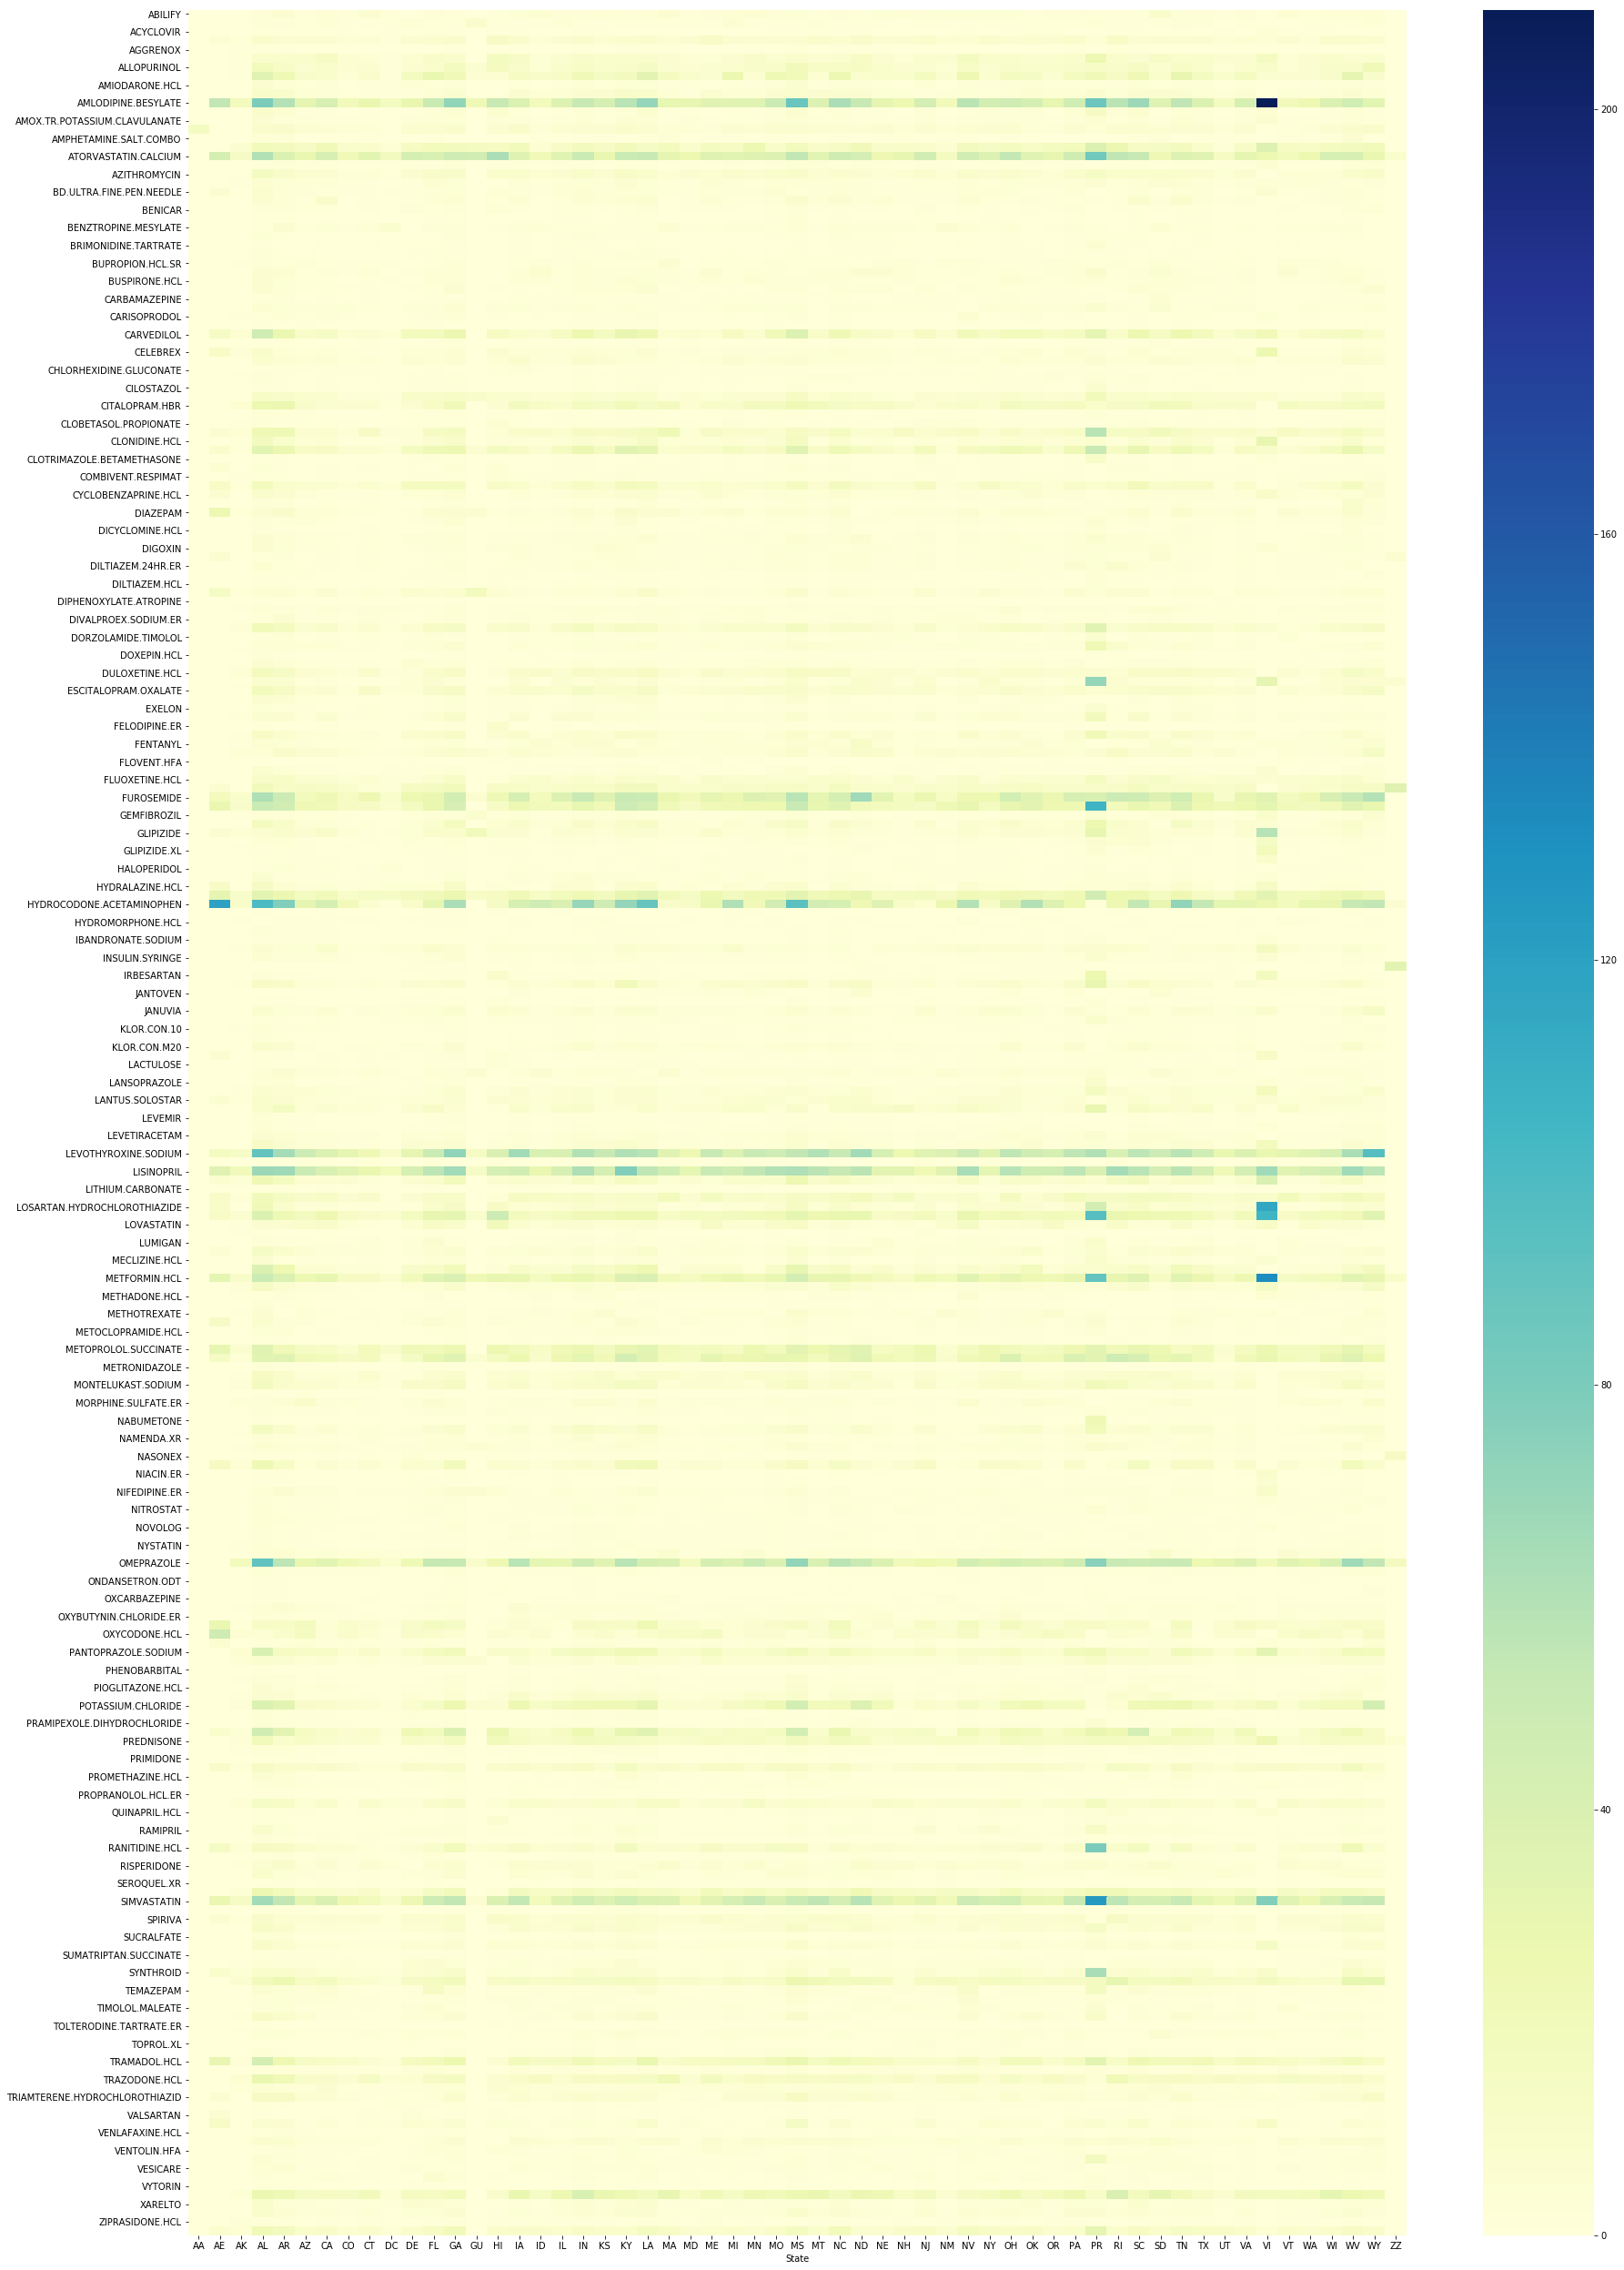

In [57]:
#Heatmap
#Demonstrates pattern of medication popularity > state prescription behavior
heatmap1_data = pd.pivot_table(prescriptions_by_state2, values=['ABILIFY','ACETAMINOPHEN.CODEINE','ACYCLOVIR','ADVAIR.DISKUS','AGGRENOX','ALENDRONATE.SODIUM','ALLOPURINOL','ALPRAZOLAM','AMIODARONE.HCL','AMITRIPTYLINE.HCL','AMLODIPINE.BESYLATE','AMLODIPINE.BESYLATE.BENAZEPRIL','AMOXICILLIN','AMOX.TR.POTASSIUM.CLAVULANATE','AMPHETAMINE.SALT.COMBO','ATENOLOL','ATORVASTATIN.CALCIUM','AVODART','AZITHROMYCIN','BACLOFEN','BD.ULTRA.FINE.PEN.NEEDLE','BENAZEPRIL.HCL','BENICAR','BENICAR.HCT','BENZTROPINE.MESYLATE','BISOPROLOL.HYDROCHLOROTHIAZIDE','BRIMONIDINE.TARTRATE','BUMETANIDE','BUPROPION.HCL.SR','BUPROPION.XL','BUSPIRONE.HCL','BYSTOLIC','CARBAMAZEPINE','CARBIDOPA.LEVODOPA','CARISOPRODOL','CARTIA.XT','CARVEDILOL','CEFUROXIME','CELEBREX','CEPHALEXIN','CHLORHEXIDINE.GLUCONATE','CHLORTHALIDONE','CILOSTAZOL','CIPROFLOXACIN.HCL','CITALOPRAM.HBR','CLINDAMYCIN.HCL','CLOBETASOL.PROPIONATE','CLONAZEPAM','CLONIDINE.HCL','CLOPIDOGREL','CLOTRIMAZOLE.BETAMETHASONE','COLCRYS','COMBIVENT.RESPIMAT','CRESTOR','CYCLOBENZAPRINE.HCL','DEXILANT','DIAZEPAM','DICLOFENAC.SODIUM','DICYCLOMINE.HCL','DIGOX','DIGOXIN','DILTIAZEM.24HR.CD','DILTIAZEM.24HR.ER','DILTIAZEM.ER','DILTIAZEM.HCL','DIOVAN','DIPHENOXYLATE.ATROPINE','DIVALPROEX.SODIUM','DIVALPROEX.SODIUM.ER','DONEPEZIL.HCL','DORZOLAMIDE.TIMOLOL','DOXAZOSIN.MESYLATE','DOXEPIN.HCL','DOXYCYCLINE.HYCLATE','DULOXETINE.HCL','ENALAPRIL.MALEATE','ESCITALOPRAM.OXALATE','ESTRADIOL','EXELON','FAMOTIDINE','FELODIPINE.ER','FENOFIBRATE','FENTANYL','FINASTERIDE','FLOVENT.HFA','FLUCONAZOLE','FLUOXETINE.HCL','FLUTICASONE.PROPIONATE','FUROSEMIDE','GABAPENTIN','GEMFIBROZIL','GLIMEPIRIDE','GLIPIZIDE','GLIPIZIDE.ER','GLIPIZIDE.XL','GLYBURIDE','HALOPERIDOL','HUMALOG','HYDRALAZINE.HCL','HYDROCHLOROTHIAZIDE','HYDROCODONE.ACETAMINOPHEN','HYDROCORTISONE','HYDROMORPHONE.HCL','HYDROXYZINE.HCL','IBANDRONATE.SODIUM','IBUPROFEN','INSULIN.SYRINGE','IPRATROPIUM.BROMIDE','IRBESARTAN','ISOSORBIDE.MONONITRATE.ER','JANTOVEN','JANUMET','JANUVIA','KETOCONAZOLE','KLOR.CON.10','KLOR.CON.M10','KLOR.CON.M20','LABETALOL.HCL','LACTULOSE','LAMOTRIGINE','LANSOPRAZOLE','LANTUS','LANTUS.SOLOSTAR','LATANOPROST','LEVEMIR','LEVEMIR.FLEXPEN','LEVETIRACETAM','LEVOFLOXACIN','LEVOTHYROXINE.SODIUM','LIDOCAINE','LISINOPRIL','LISINOPRIL.HYDROCHLOROTHIAZIDE','LITHIUM.CARBONATE','LORAZEPAM','LOSARTAN.HYDROCHLOROTHIAZIDE','LOSARTAN.POTASSIUM','LOVASTATIN','LOVAZA','LUMIGAN','LYRICA','MECLIZINE.HCL','MELOXICAM','METFORMIN.HCL','METFORMIN.HCL.ER','METHADONE.HCL','METHOCARBAMOL','METHOTREXATE','METHYLPREDNISOLONE','METOCLOPRAMIDE.HCL','METOLAZONE','METOPROLOL.SUCCINATE','METOPROLOL.TARTRATE','METRONIDAZOLE','MIRTAZAPINE','MONTELUKAST.SODIUM','MORPHINE.SULFATE','MORPHINE.SULFATE.ER','MUPIROCIN','NABUMETONE','NAMENDA','NAMENDA.XR','NAPROXEN','NASONEX','NEXIUM','NIACIN.ER','NIFEDICAL.XL','NIFEDIPINE.ER','NITROFURANTOIN.MONO.MACRO','NITROSTAT','NORTRIPTYLINE.HCL','NOVOLOG','NOVOLOG.FLEXPEN','NYSTATIN','OLANZAPINE','OMEPRAZOLE','ONDANSETRON.HCL','ONDANSETRON.ODT','ONGLYZA','OXCARBAZEPINE','OXYBUTYNIN.CHLORIDE','OXYBUTYNIN.CHLORIDE.ER','OXYCODONE.ACETAMINOPHEN','OXYCODONE.HCL','OXYCONTIN','PANTOPRAZOLE.SODIUM','PAROXETINE.HCL','PHENOBARBITAL','PHENYTOIN.SODIUM.EXTENDED','PIOGLITAZONE.HCL','POLYETHYLENE.GLYCOL.3350','POTASSIUM.CHLORIDE','PRADAXA','PRAMIPEXOLE.DIHYDROCHLORIDE','PRAVASTATIN.SODIUM','PREDNISONE','PREMARIN','PRIMIDONE','PROAIR.HFA','PROMETHAZINE.HCL','PROPRANOLOL.HCL','PROPRANOLOL.HCL.ER','QUETIAPINE.FUMARATE','QUINAPRIL.HCL','RALOXIFENE.HCL','RAMIPRIL','RANEXA','RANITIDINE.HCL','RESTASIS','RISPERIDONE','ROPINIROLE.HCL','SEROQUEL.XR','SERTRALINE.HCL','SIMVASTATIN','SOTALOL','SPIRIVA','SPIRONOLACTONE','SUCRALFATE','SULFAMETHOXAZOLE.TRIMETHOPRIM','SUMATRIPTAN.SUCCINATE','SYMBICORT','SYNTHROID','TAMSULOSIN.HCL','TEMAZEPAM','TERAZOSIN.HCL','TIMOLOL.MALEATE','TIZANIDINE.HCL','TOLTERODINE.TARTRATE.ER','TOPIRAMATE','TOPROL.XL','TORSEMIDE','TRAMADOL.HCL','TRAVATAN.Z','TRAZODONE.HCL','TRIAMCINOLONE.ACETONIDE','TRIAMTERENE.HYDROCHLOROTHIAZID','VALACYCLOVIR','VALSARTAN','VALSARTAN.HYDROCHLOROTHIAZIDE','VENLAFAXINE.HCL','VENLAFAXINE.HCL.ER','VENTOLIN.HFA','VERAPAMIL.ER','VESICARE','VOLTAREN','VYTORIN','WARFARIN.SODIUM','XARELTO','ZETIA','ZIPRASIDONE.HCL','ZOLPIDEM.TARTRATE']
                     ,columns=['State'])
plt.figure(figsize=(30,45))
sns.heatmap(heatmap1_data, cmap="YlGnBu")

### Overdoses

In [58]:
od_by_state=overdoses.set_index(['State'])
od_by_state.head()

,Population,Deaths,Abbrev
State,,,
Alabama,"4,833,722",723,AL
Alaska,"735,132",124,AK
Arizona,"6,626,624","1,211",AZ
Arkansas,"2,959,373",356,AR
California,"38,332,521","4,521",CA


In [60]:
#To compare with average number of prescriptions (Example: Alabama)
data = dict (
  type = 'choropleth',
  locations = od_by_state['Abbrev'],
  locationmode='USA-states',
  colorscale = 'Reds',
  z=od_by_state['Deaths'])
lyt = dict(geo=dict(scope='usa'))
map = go.Figure(data=[data], layout = lyt)
py.offline.plot(map)

'file:///dartfs/rc/lab/P/Psych81.09/course/abbyzweifach/storytelling-with-data/data-stories/us-opiate-data/temp-plot.html'

In [61]:
x2 = prescriptions_by_state2.drop(['AA','AE','DC','GU','VI','PR','ZZ'])
x3= od_by_state.set_index(['Abbrev']).sort_values('Abbrev', ascending = True)
x3["Deaths"] = x3["Deaths"].str.replace(",","").astype(float)
pd.to_numeric(x3['Deaths'])
x4 = np.diff(x3['Deaths'])
x2.sort_values('State', ascending=True)
x2['Deaths']=pd.to_numeric(x3['Deaths']).tolist()
x2.head()

,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,AMIODARONE.HCL,AMITRIPTYLINE.HCL,...,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Average,Deaths
State,,,,,,,,,,,,,,,,,,,,,
AK,0.282051,0.282051,0.000000,1.794872,1.179487,2.230769,0.923077,2.307692,0.000000,1.102564,...,0.333333,0.743590,0.000000,4.153846,0.410256,0.769231,2.846154,3.487179,1.638267,124.0
AL,3.002907,2.674419,1.921512,9.694767,1.148256,9.601744,19.424419,35.883721,5.892442,9.930233,...,3.476744,3.264535,2.034884,27.255814,9.226744,8.677326,0.930233,22.186047,10.556310,723.0
AR,6.356481,2.685185,1.504630,6.444444,1.291667,8.421296,12.217593,23.402778,3.898148,9.597222,...,5.032407,1.736111,1.097222,23.444444,3.574074,5.324074,1.949074,17.333333,7.993065,356.0
AZ,1.253438,2.165029,2.290766,5.974460,0.055010,9.125737,6.764244,9.872299,1.864440,4.500982,...,1.355599,1.748527,1.056974,14.017682,2.946955,2.730845,0.638507,9.047151,4.455537,1211.0
CA,3.364949,3.564793,1.613193,6.107338,0.540593,14.718970,8.365730,9.728728,2.469165,2.988681,...,1.870023,3.511710,0.597580,14.795472,2.336066,3.290788,1.597970,11.278298,4.863341,4521.0


/optnfs/el7/jupyterhub/envs/Psych81.09/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



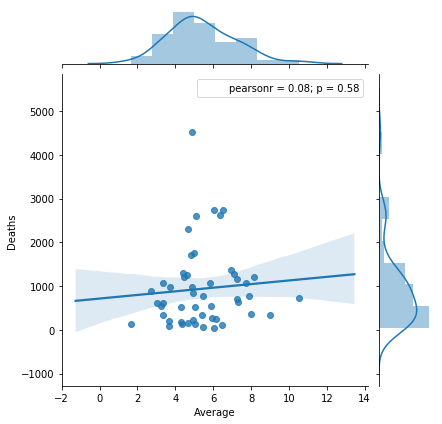

In [62]:
#Average number of prescriptions/state vs. overdoses/state
#Smaller correlation than expected, but overdoses may occur more frequently in populations that obtain the substances illegally
sns.jointplot(x2['Average'], x2['Deaths'], kind='reg', stat_func=pearsonr)

## Analysis by Medication

In [63]:
#The total number of prescriptions across all states by medication
tot_prescriptions = prescriptions_by_state.sum(axis=0)
tot_prescriptions.head()

ABILIFY                  163.177864
ACETAMINOPHEN.CODEINE    113.393585
ACYCLOVIR                 57.122766
ADVAIR.DISKUS            370.597735
AGGRENOX                  35.845398
dtype: float64

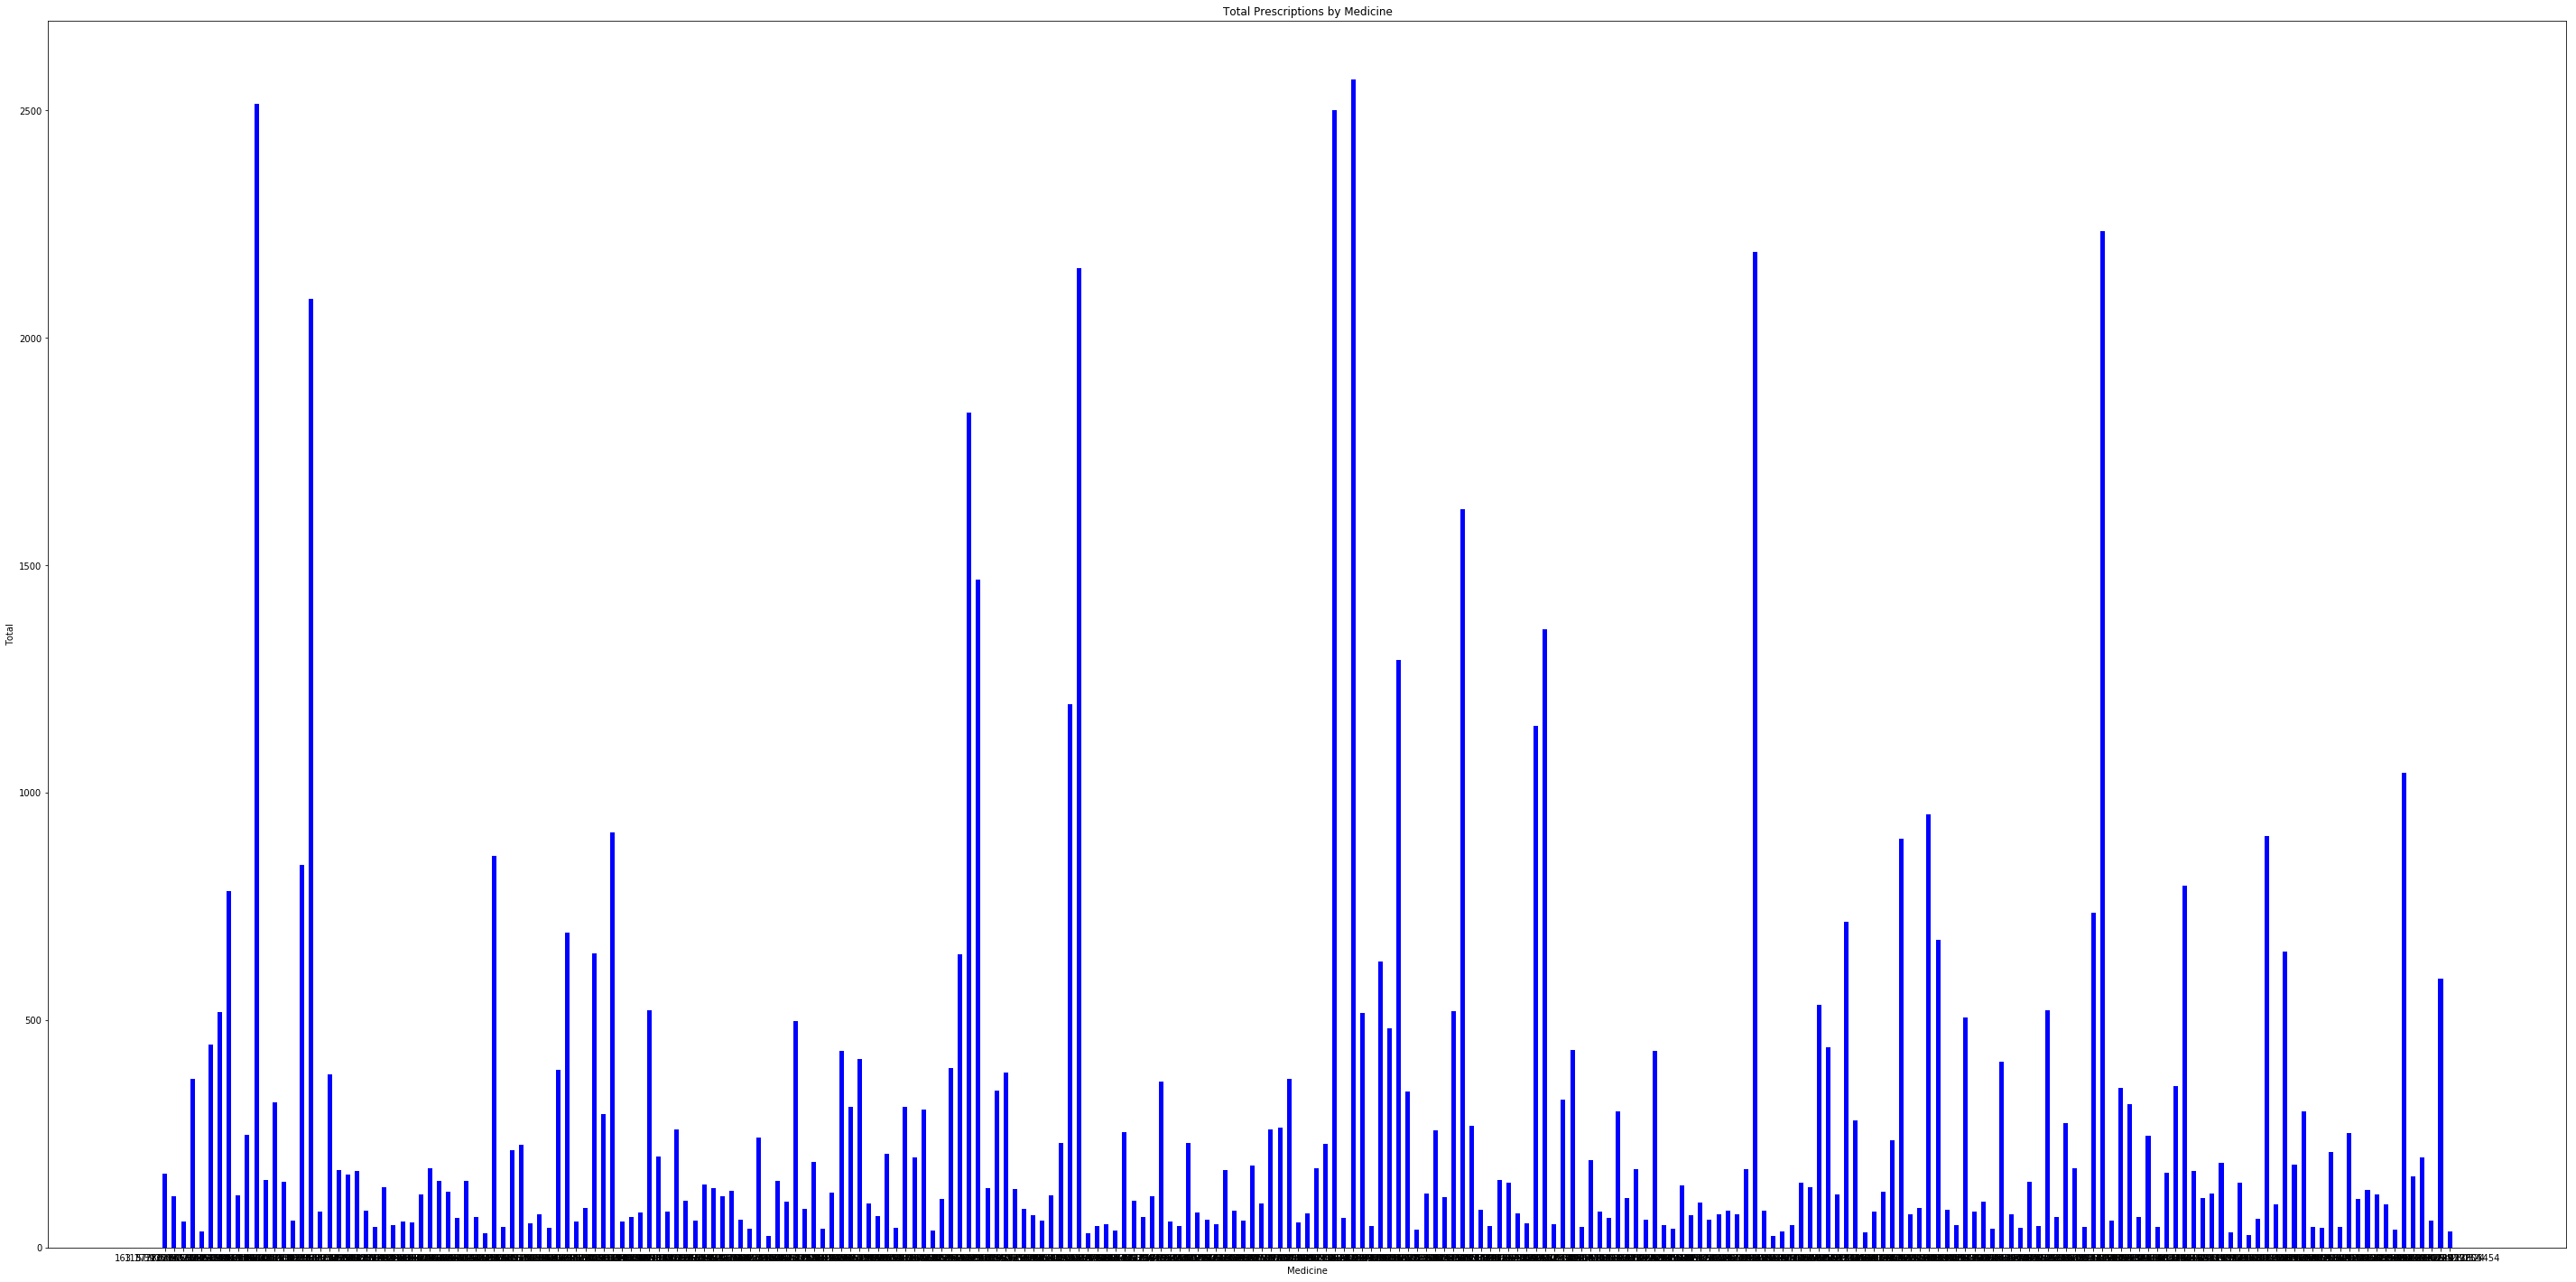

In [64]:
medicine = tot_prescriptions.index
total = prescriptions_by_state.sum(axis=0)

med_pos = [i for i, _ in enumerate(medicine)]
barplot = plt.figure(figsize=(50,25))
plt.bar(med_pos, total, width=0.5, color='blue')
plt.xlabel("Medicine")
plt.ylabel("Total")
plt.title("Total Prescriptions by Medicine")
plt.xticks(med_pos, total)

plt.show()

In [65]:
#Ten most prescribed medicines
tot_prescriptions.sort_values(ascending=False).head(10)

LISINOPRIL                   2569.216455
AMLODIPINE.BESYLATE          2514.528648
LEVOTHYROXINE.SODIUM         2501.417493
SIMVASTATIN                  2234.801460
OMEPRAZOLE                   2189.226359
HYDROCODONE.ACETAMINOPHEN    2153.256502
ATORVASTATIN.CALCIUM         2086.363280
FUROSEMIDE                   1836.211127
METFORMIN.HCL                1622.477314
GABAPENTIN                   1469.412723
dtype: float64

## Analysis by Practice

In [66]:
prescriptions_by_practice = prescriptions1.groupby('Specialty').aggregate(np.mean)
prescriptions_by_practice.head(5)

,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,AMIODARONE.HCL,AMITRIPTYLINE.HCL,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
Specialty,,,,,,,,,,,,,,,,,,,,,
Addiction Medicine,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,21.333333,...,0.000000,0.0,9.333333,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.666667
Allergy/Immunology,0.00000,0.000000,0.0,39.628099,0.0,0.561983,1.041322,1.264463,0.000000,1.438017,...,0.247934,0.0,0.173554,0.0,0.239669,0.000000,0.190083,0.0,1.090909,0.066116
Anesthesiology,0.65942,1.557971,0.0,0.159420,0.0,0.297101,0.166667,8.376812,0.000000,8.797101,...,0.000000,0.0,7.942029,0.0,0.659420,0.086957,0.079710,0.0,8.152174,0.673913
Behavioral Analyst,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
CRNA,0.00000,0.000000,0.0,0.000000,0.0,2.000000,0.000000,0.000000,1.833333,0.000000,...,0.000000,0.0,0.000000,0.0,7.500000,0.000000,0.000000,0.0,0.000000,0.166667


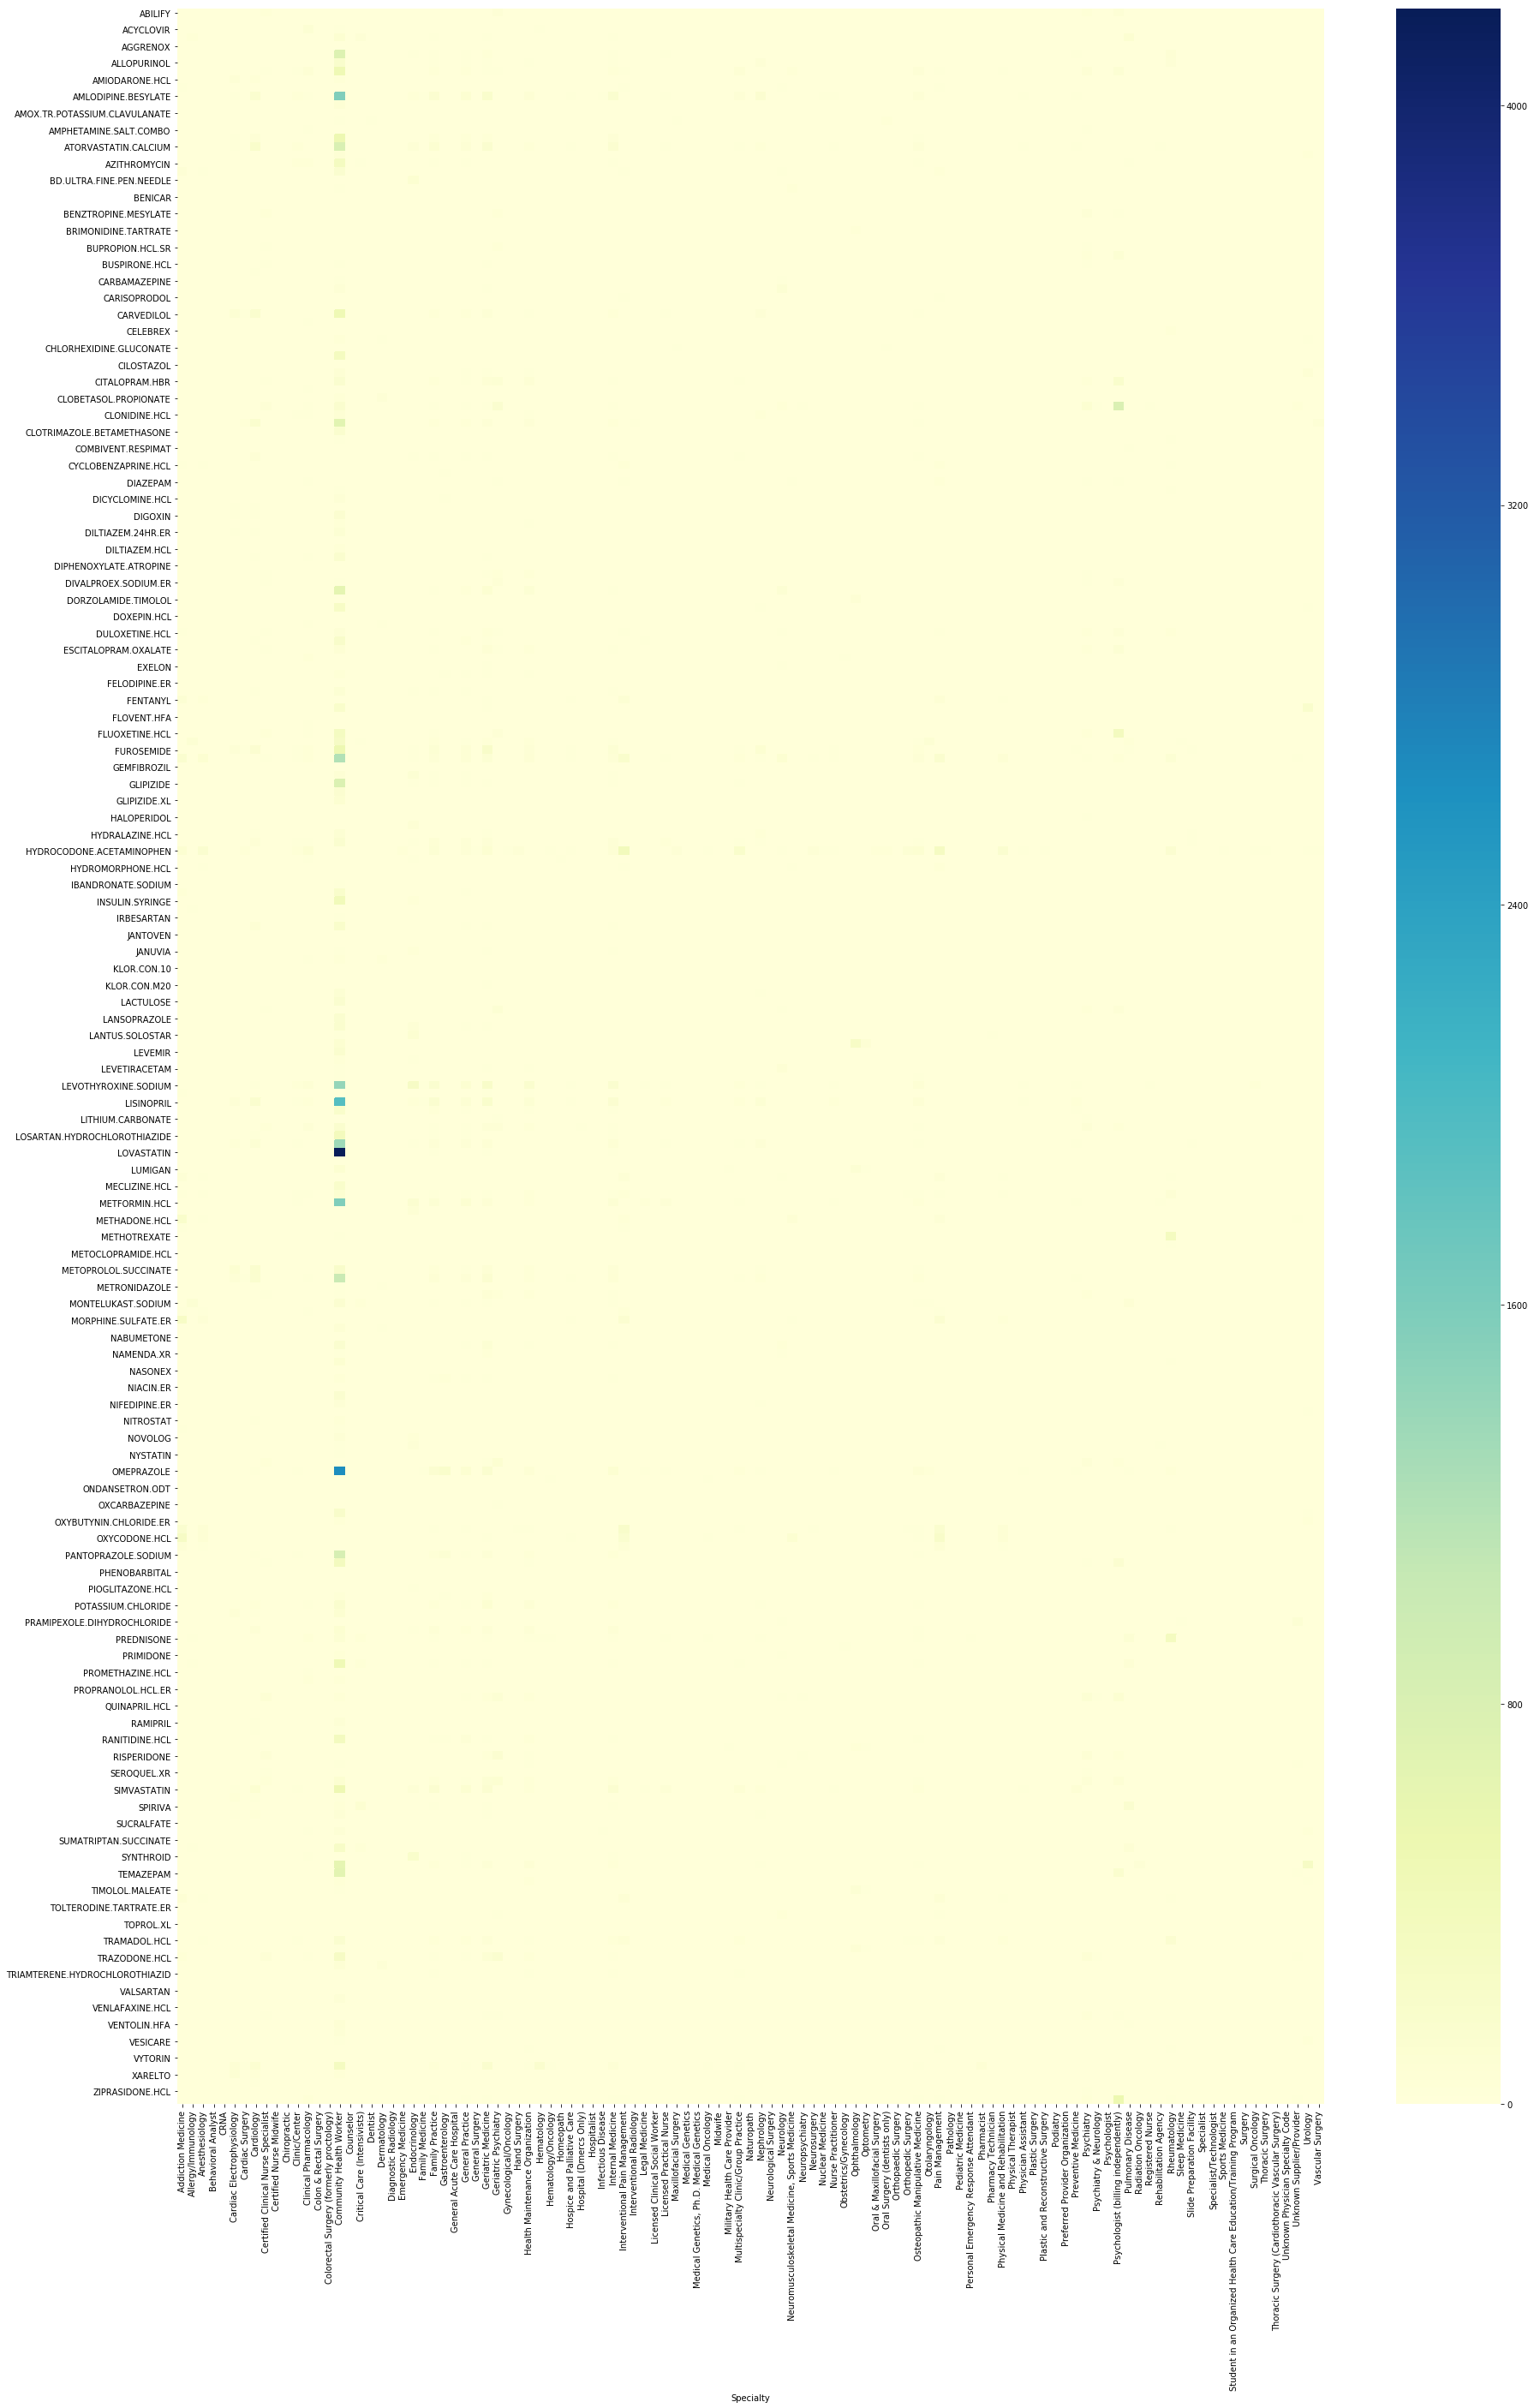

In [67]:
#Surprising that Community Health Worker is dominant
heatmap2_data = pd.pivot_table(prescriptions_by_practice, columns = prescriptions_by_practice.index, values =['ABILIFY','ACETAMINOPHEN.CODEINE','ACYCLOVIR','ADVAIR.DISKUS','AGGRENOX','ALENDRONATE.SODIUM','ALLOPURINOL','ALPRAZOLAM','AMIODARONE.HCL','AMITRIPTYLINE.HCL','AMLODIPINE.BESYLATE','AMLODIPINE.BESYLATE.BENAZEPRIL','AMOXICILLIN','AMOX.TR.POTASSIUM.CLAVULANATE','AMPHETAMINE.SALT.COMBO','ATENOLOL','ATORVASTATIN.CALCIUM','AVODART','AZITHROMYCIN','BACLOFEN','BD.ULTRA.FINE.PEN.NEEDLE','BENAZEPRIL.HCL','BENICAR','BENICAR.HCT','BENZTROPINE.MESYLATE','BISOPROLOL.HYDROCHLOROTHIAZIDE','BRIMONIDINE.TARTRATE','BUMETANIDE','BUPROPION.HCL.SR','BUPROPION.XL','BUSPIRONE.HCL','BYSTOLIC','CARBAMAZEPINE','CARBIDOPA.LEVODOPA','CARISOPRODOL','CARTIA.XT','CARVEDILOL','CEFUROXIME','CELEBREX','CEPHALEXIN','CHLORHEXIDINE.GLUCONATE','CHLORTHALIDONE','CILOSTAZOL','CIPROFLOXACIN.HCL','CITALOPRAM.HBR','CLINDAMYCIN.HCL','CLOBETASOL.PROPIONATE','CLONAZEPAM','CLONIDINE.HCL','CLOPIDOGREL','CLOTRIMAZOLE.BETAMETHASONE','COLCRYS','COMBIVENT.RESPIMAT','CRESTOR','CYCLOBENZAPRINE.HCL','DEXILANT','DIAZEPAM','DICLOFENAC.SODIUM','DICYCLOMINE.HCL','DIGOX','DIGOXIN','DILTIAZEM.24HR.CD','DILTIAZEM.24HR.ER','DILTIAZEM.ER','DILTIAZEM.HCL','DIOVAN','DIPHENOXYLATE.ATROPINE','DIVALPROEX.SODIUM','DIVALPROEX.SODIUM.ER','DONEPEZIL.HCL','DORZOLAMIDE.TIMOLOL','DOXAZOSIN.MESYLATE','DOXEPIN.HCL','DOXYCYCLINE.HYCLATE','DULOXETINE.HCL','ENALAPRIL.MALEATE','ESCITALOPRAM.OXALATE','ESTRADIOL','EXELON','FAMOTIDINE','FELODIPINE.ER','FENOFIBRATE','FENTANYL','FINASTERIDE','FLOVENT.HFA','FLUCONAZOLE','FLUOXETINE.HCL','FLUTICASONE.PROPIONATE','FUROSEMIDE','GABAPENTIN','GEMFIBROZIL','GLIMEPIRIDE','GLIPIZIDE','GLIPIZIDE.ER','GLIPIZIDE.XL','GLYBURIDE','HALOPERIDOL','HUMALOG','HYDRALAZINE.HCL','HYDROCHLOROTHIAZIDE','HYDROCODONE.ACETAMINOPHEN','HYDROCORTISONE','HYDROMORPHONE.HCL','HYDROXYZINE.HCL','IBANDRONATE.SODIUM','IBUPROFEN','INSULIN.SYRINGE','IPRATROPIUM.BROMIDE','IRBESARTAN','ISOSORBIDE.MONONITRATE.ER','JANTOVEN','JANUMET','JANUVIA','KETOCONAZOLE','KLOR.CON.10','KLOR.CON.M10','KLOR.CON.M20','LABETALOL.HCL','LACTULOSE','LAMOTRIGINE','LANSOPRAZOLE','LANTUS','LANTUS.SOLOSTAR','LATANOPROST','LEVEMIR','LEVEMIR.FLEXPEN','LEVETIRACETAM','LEVOFLOXACIN','LEVOTHYROXINE.SODIUM','LIDOCAINE','LISINOPRIL','LISINOPRIL.HYDROCHLOROTHIAZIDE','LITHIUM.CARBONATE','LORAZEPAM','LOSARTAN.HYDROCHLOROTHIAZIDE','LOSARTAN.POTASSIUM','LOVASTATIN','LOVAZA','LUMIGAN','LYRICA','MECLIZINE.HCL','MELOXICAM','METFORMIN.HCL','METFORMIN.HCL.ER','METHADONE.HCL','METHOCARBAMOL','METHOTREXATE','METHYLPREDNISOLONE','METOCLOPRAMIDE.HCL','METOLAZONE','METOPROLOL.SUCCINATE','METOPROLOL.TARTRATE','METRONIDAZOLE','MIRTAZAPINE','MONTELUKAST.SODIUM','MORPHINE.SULFATE','MORPHINE.SULFATE.ER','MUPIROCIN','NABUMETONE','NAMENDA','NAMENDA.XR','NAPROXEN','NASONEX','NEXIUM','NIACIN.ER','NIFEDICAL.XL','NIFEDIPINE.ER','NITROFURANTOIN.MONO.MACRO','NITROSTAT','NORTRIPTYLINE.HCL','NOVOLOG','NOVOLOG.FLEXPEN','NYSTATIN','OLANZAPINE','OMEPRAZOLE','ONDANSETRON.HCL','ONDANSETRON.ODT','ONGLYZA','OXCARBAZEPINE','OXYBUTYNIN.CHLORIDE','OXYBUTYNIN.CHLORIDE.ER','OXYCODONE.ACETAMINOPHEN','OXYCODONE.HCL','OXYCONTIN','PANTOPRAZOLE.SODIUM','PAROXETINE.HCL','PHENOBARBITAL','PHENYTOIN.SODIUM.EXTENDED','PIOGLITAZONE.HCL','POLYETHYLENE.GLYCOL.3350','POTASSIUM.CHLORIDE','PRADAXA','PRAMIPEXOLE.DIHYDROCHLORIDE','PRAVASTATIN.SODIUM','PREDNISONE','PREMARIN','PRIMIDONE','PROAIR.HFA','PROMETHAZINE.HCL','PROPRANOLOL.HCL','PROPRANOLOL.HCL.ER','QUETIAPINE.FUMARATE','QUINAPRIL.HCL','RALOXIFENE.HCL','RAMIPRIL','RANEXA','RANITIDINE.HCL','RESTASIS','RISPERIDONE','ROPINIROLE.HCL','SEROQUEL.XR','SERTRALINE.HCL','SIMVASTATIN','SOTALOL','SPIRIVA','SPIRONOLACTONE','SUCRALFATE','SULFAMETHOXAZOLE.TRIMETHOPRIM','SUMATRIPTAN.SUCCINATE','SYMBICORT','SYNTHROID','TAMSULOSIN.HCL','TEMAZEPAM','TERAZOSIN.HCL','TIMOLOL.MALEATE','TIZANIDINE.HCL','TOLTERODINE.TARTRATE.ER','TOPIRAMATE','TOPROL.XL','TORSEMIDE','TRAMADOL.HCL','TRAVATAN.Z','TRAZODONE.HCL','TRIAMCINOLONE.ACETONIDE','TRIAMTERENE.HYDROCHLOROTHIAZID','VALACYCLOVIR','VALSARTAN','VALSARTAN.HYDROCHLOROTHIAZIDE','VENLAFAXINE.HCL','VENLAFAXINE.HCL.ER','VENTOLIN.HFA','VERAPAMIL.ER','VESICARE','VOLTAREN','VYTORIN','WARFARIN.SODIUM','XARELTO','ZETIA','ZIPRASIDONE.HCL','ZOLPIDEM.TARTRATE'])
plt.figure(figsize=(30,45))
sns.heatmap(heatmap2_data, cmap="YlGnBu")

In [68]:
#Want to look into surgery specialities 
prescriptions_by_practice2 = prescriptions_by_practice[prescriptions_by_practice.index.str.contains('Surgery')] 
prescriptions_by_practice2

,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,AMIODARONE.HCL,AMITRIPTYLINE.HCL,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
Specialty,,,,,,,,,,,,,,,,,,,,,
Cardiac Surgery,0.000000,5.736842,0.000000,0.000000,0.000000,0.000000,0.631579,0.684211,10.684211,0.000000,...,0.000000,0.000000,0.000000,0.631579,18.473684,5.105263,0.000000,0.000000,1.210526,0.842105
Colon & Rectal Surgery,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333
Colorectal Surgery (formerly proctology),0.000000,0.000000,1.903226,0.000000,0.000000,0.000000,0.000000,0.516129,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.870968
General Surgery,0.238193,1.149897,0.147844,0.178645,0.022587,0.207392,0.624230,3.000000,0.129363,0.258727,...,0.049281,0.129363,0.036961,0.045175,0.924025,0.285421,0.114990,0.000000,1.041068,0.907598
Hand Surgery,0.000000,9.564103,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.205128,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
Maxillofacial Surgery,0.000000,12.297297,0.000000,0.000000,0.000000,0.000000,0.000000,3.135135,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.270270,0.945946
Neurological Surgery,0.000000,0.000000,2.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000
Oral & Maxillofacial Surgery,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.875000
Oral Surgery (dentists only),0.000000,14.585714,0.000000,0.000000,0.000000,0.000000,0.000000,0.178571,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.907143


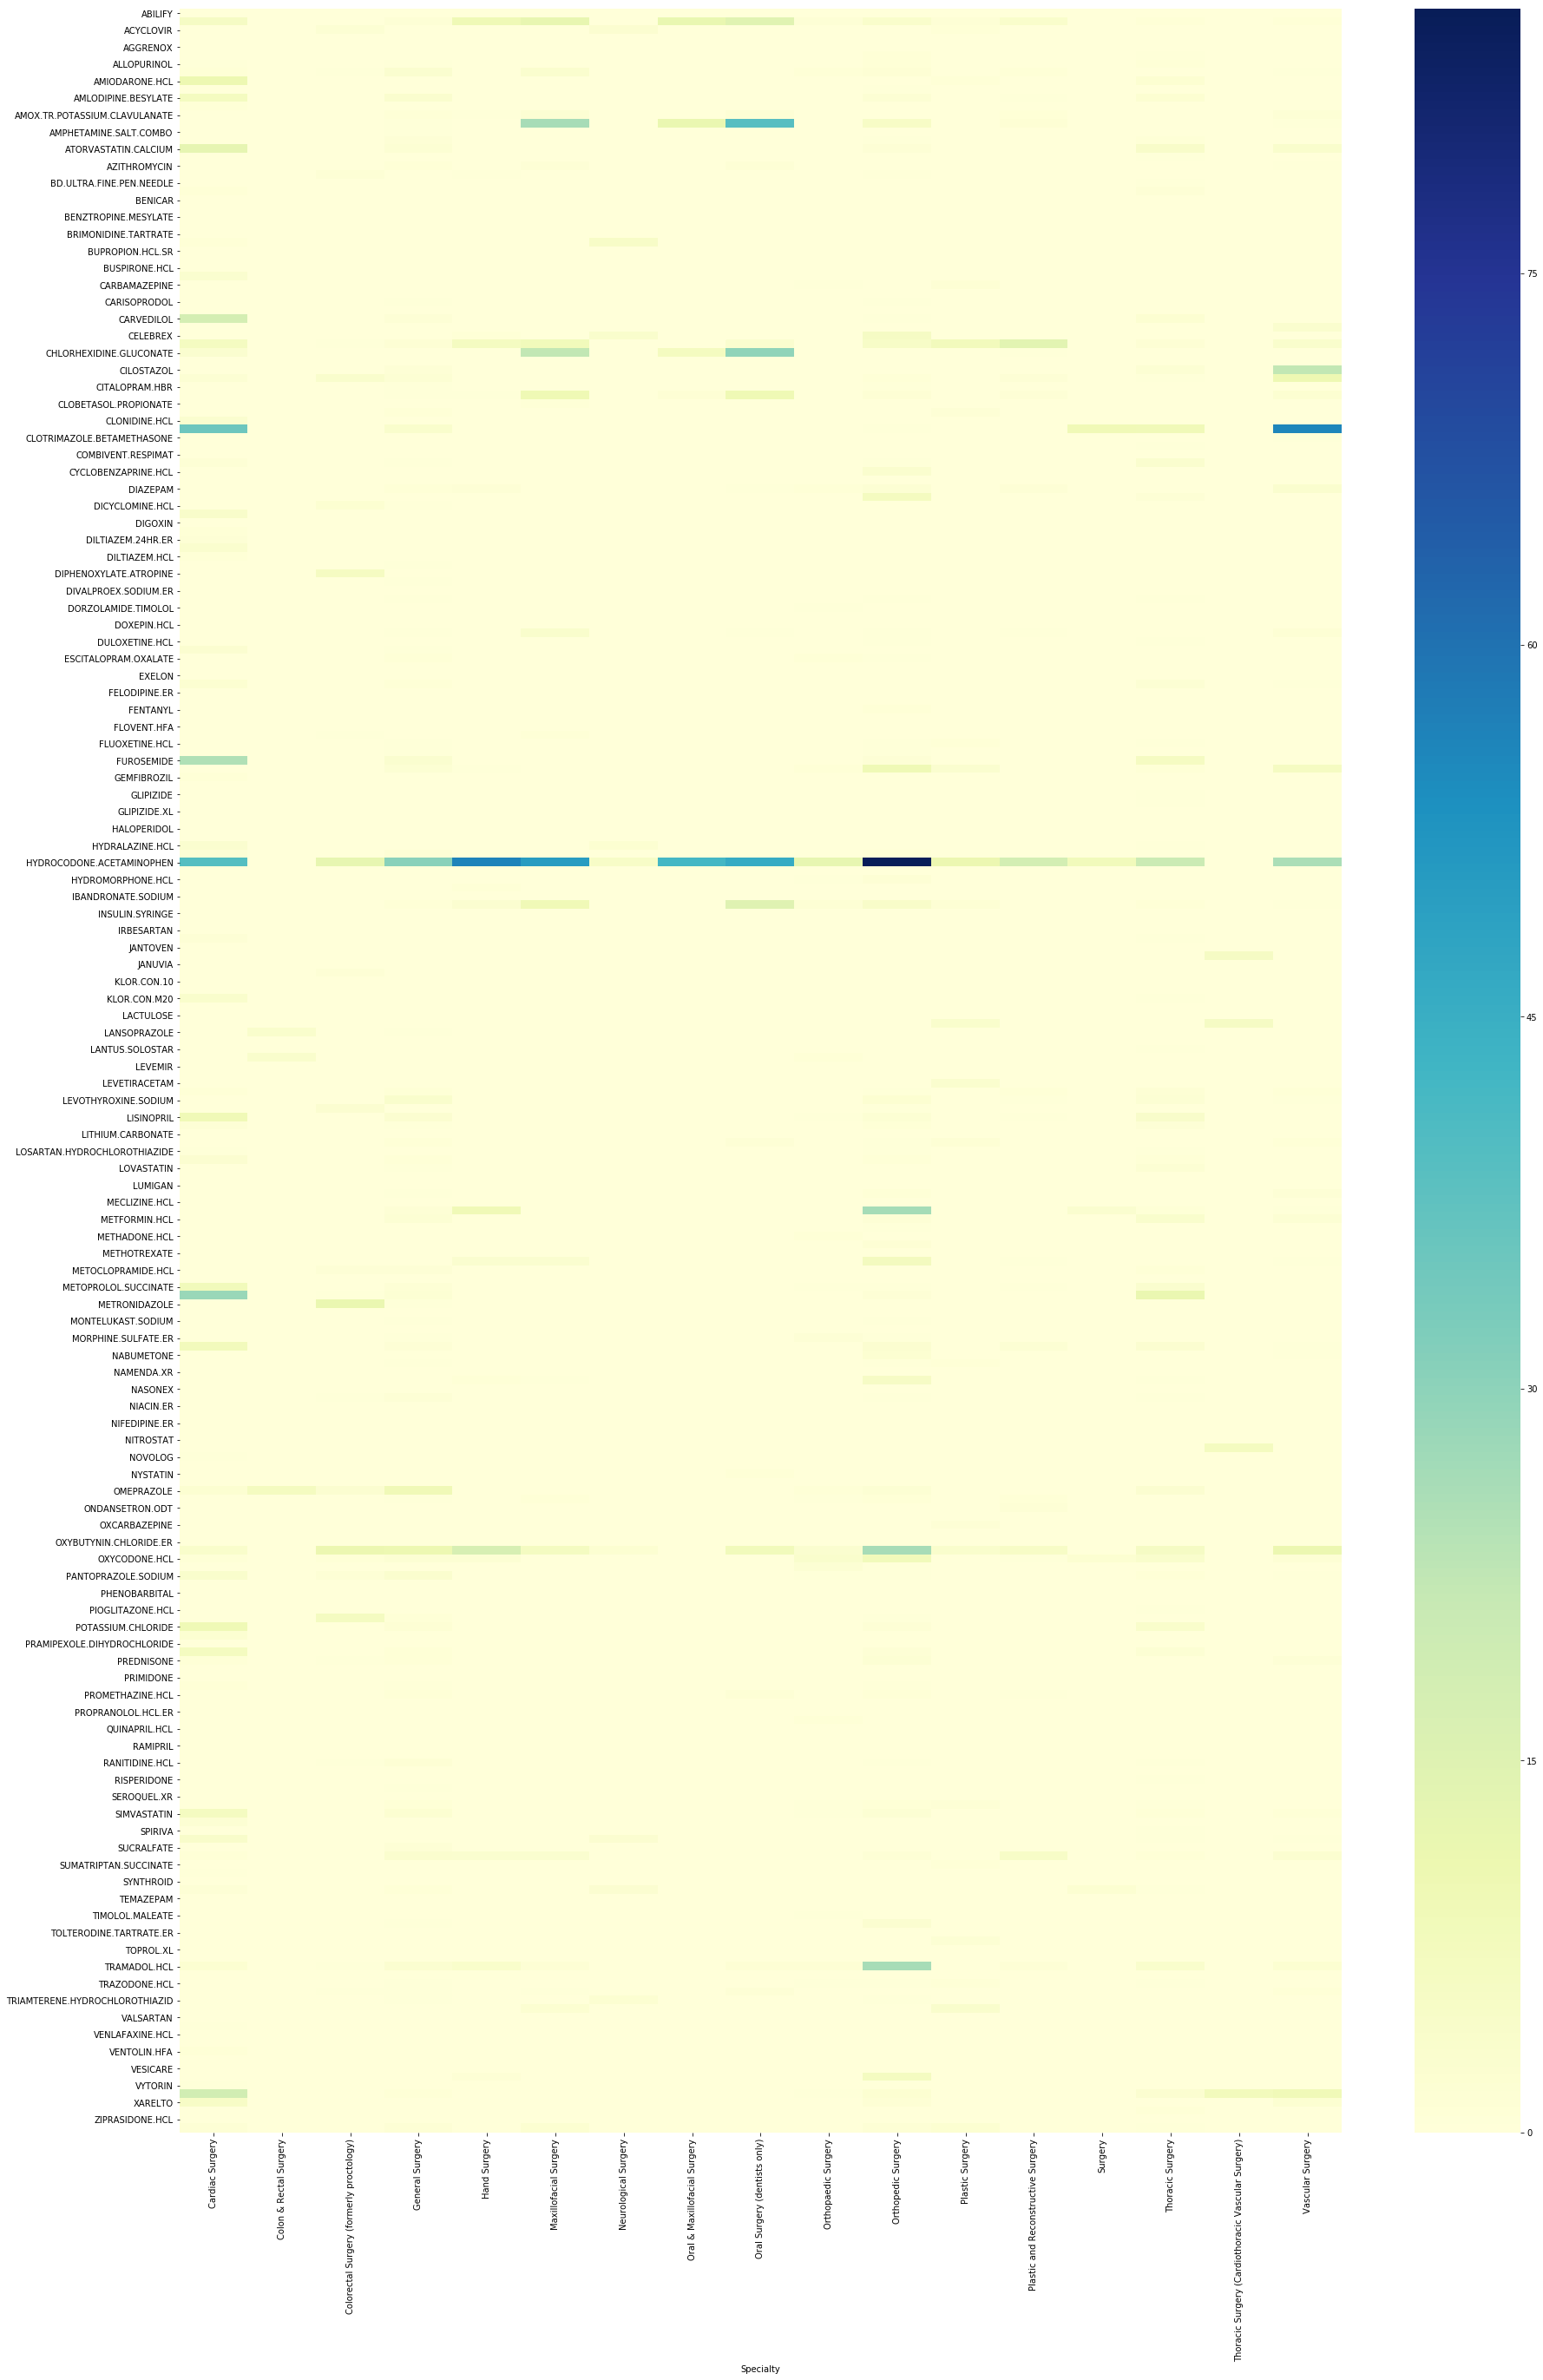

In [69]:
#Unsurprsingly, hydrocodone is the most heavily prescribed among surgeons 
heatmap3_data = pd.pivot_table(prescriptions_by_practice2, columns = prescriptions_by_practice2.index, values =['ABILIFY','ACETAMINOPHEN.CODEINE','ACYCLOVIR','ADVAIR.DISKUS','AGGRENOX','ALENDRONATE.SODIUM','ALLOPURINOL','ALPRAZOLAM','AMIODARONE.HCL','AMITRIPTYLINE.HCL','AMLODIPINE.BESYLATE','AMLODIPINE.BESYLATE.BENAZEPRIL','AMOXICILLIN','AMOX.TR.POTASSIUM.CLAVULANATE','AMPHETAMINE.SALT.COMBO','ATENOLOL','ATORVASTATIN.CALCIUM','AVODART','AZITHROMYCIN','BACLOFEN','BD.ULTRA.FINE.PEN.NEEDLE','BENAZEPRIL.HCL','BENICAR','BENICAR.HCT','BENZTROPINE.MESYLATE','BISOPROLOL.HYDROCHLOROTHIAZIDE','BRIMONIDINE.TARTRATE','BUMETANIDE','BUPROPION.HCL.SR','BUPROPION.XL','BUSPIRONE.HCL','BYSTOLIC','CARBAMAZEPINE','CARBIDOPA.LEVODOPA','CARISOPRODOL','CARTIA.XT','CARVEDILOL','CEFUROXIME','CELEBREX','CEPHALEXIN','CHLORHEXIDINE.GLUCONATE','CHLORTHALIDONE','CILOSTAZOL','CIPROFLOXACIN.HCL','CITALOPRAM.HBR','CLINDAMYCIN.HCL','CLOBETASOL.PROPIONATE','CLONAZEPAM','CLONIDINE.HCL','CLOPIDOGREL','CLOTRIMAZOLE.BETAMETHASONE','COLCRYS','COMBIVENT.RESPIMAT','CRESTOR','CYCLOBENZAPRINE.HCL','DEXILANT','DIAZEPAM','DICLOFENAC.SODIUM','DICYCLOMINE.HCL','DIGOX','DIGOXIN','DILTIAZEM.24HR.CD','DILTIAZEM.24HR.ER','DILTIAZEM.ER','DILTIAZEM.HCL','DIOVAN','DIPHENOXYLATE.ATROPINE','DIVALPROEX.SODIUM','DIVALPROEX.SODIUM.ER','DONEPEZIL.HCL','DORZOLAMIDE.TIMOLOL','DOXAZOSIN.MESYLATE','DOXEPIN.HCL','DOXYCYCLINE.HYCLATE','DULOXETINE.HCL','ENALAPRIL.MALEATE','ESCITALOPRAM.OXALATE','ESTRADIOL','EXELON','FAMOTIDINE','FELODIPINE.ER','FENOFIBRATE','FENTANYL','FINASTERIDE','FLOVENT.HFA','FLUCONAZOLE','FLUOXETINE.HCL','FLUTICASONE.PROPIONATE','FUROSEMIDE','GABAPENTIN','GEMFIBROZIL','GLIMEPIRIDE','GLIPIZIDE','GLIPIZIDE.ER','GLIPIZIDE.XL','GLYBURIDE','HALOPERIDOL','HUMALOG','HYDRALAZINE.HCL','HYDROCHLOROTHIAZIDE','HYDROCODONE.ACETAMINOPHEN','HYDROCORTISONE','HYDROMORPHONE.HCL','HYDROXYZINE.HCL','IBANDRONATE.SODIUM','IBUPROFEN','INSULIN.SYRINGE','IPRATROPIUM.BROMIDE','IRBESARTAN','ISOSORBIDE.MONONITRATE.ER','JANTOVEN','JANUMET','JANUVIA','KETOCONAZOLE','KLOR.CON.10','KLOR.CON.M10','KLOR.CON.M20','LABETALOL.HCL','LACTULOSE','LAMOTRIGINE','LANSOPRAZOLE','LANTUS','LANTUS.SOLOSTAR','LATANOPROST','LEVEMIR','LEVEMIR.FLEXPEN','LEVETIRACETAM','LEVOFLOXACIN','LEVOTHYROXINE.SODIUM','LIDOCAINE','LISINOPRIL','LISINOPRIL.HYDROCHLOROTHIAZIDE','LITHIUM.CARBONATE','LORAZEPAM','LOSARTAN.HYDROCHLOROTHIAZIDE','LOSARTAN.POTASSIUM','LOVASTATIN','LOVAZA','LUMIGAN','LYRICA','MECLIZINE.HCL','MELOXICAM','METFORMIN.HCL','METFORMIN.HCL.ER','METHADONE.HCL','METHOCARBAMOL','METHOTREXATE','METHYLPREDNISOLONE','METOCLOPRAMIDE.HCL','METOLAZONE','METOPROLOL.SUCCINATE','METOPROLOL.TARTRATE','METRONIDAZOLE','MIRTAZAPINE','MONTELUKAST.SODIUM','MORPHINE.SULFATE','MORPHINE.SULFATE.ER','MUPIROCIN','NABUMETONE','NAMENDA','NAMENDA.XR','NAPROXEN','NASONEX','NEXIUM','NIACIN.ER','NIFEDICAL.XL','NIFEDIPINE.ER','NITROFURANTOIN.MONO.MACRO','NITROSTAT','NORTRIPTYLINE.HCL','NOVOLOG','NOVOLOG.FLEXPEN','NYSTATIN','OLANZAPINE','OMEPRAZOLE','ONDANSETRON.HCL','ONDANSETRON.ODT','ONGLYZA','OXCARBAZEPINE','OXYBUTYNIN.CHLORIDE','OXYBUTYNIN.CHLORIDE.ER','OXYCODONE.ACETAMINOPHEN','OXYCODONE.HCL','OXYCONTIN','PANTOPRAZOLE.SODIUM','PAROXETINE.HCL','PHENOBARBITAL','PHENYTOIN.SODIUM.EXTENDED','PIOGLITAZONE.HCL','POLYETHYLENE.GLYCOL.3350','POTASSIUM.CHLORIDE','PRADAXA','PRAMIPEXOLE.DIHYDROCHLORIDE','PRAVASTATIN.SODIUM','PREDNISONE','PREMARIN','PRIMIDONE','PROAIR.HFA','PROMETHAZINE.HCL','PROPRANOLOL.HCL','PROPRANOLOL.HCL.ER','QUETIAPINE.FUMARATE','QUINAPRIL.HCL','RALOXIFENE.HCL','RAMIPRIL','RANEXA','RANITIDINE.HCL','RESTASIS','RISPERIDONE','ROPINIROLE.HCL','SEROQUEL.XR','SERTRALINE.HCL','SIMVASTATIN','SOTALOL','SPIRIVA','SPIRONOLACTONE','SUCRALFATE','SULFAMETHOXAZOLE.TRIMETHOPRIM','SUMATRIPTAN.SUCCINATE','SYMBICORT','SYNTHROID','TAMSULOSIN.HCL','TEMAZEPAM','TERAZOSIN.HCL','TIMOLOL.MALEATE','TIZANIDINE.HCL','TOLTERODINE.TARTRATE.ER','TOPIRAMATE','TOPROL.XL','TORSEMIDE','TRAMADOL.HCL','TRAVATAN.Z','TRAZODONE.HCL','TRIAMCINOLONE.ACETONIDE','TRIAMTERENE.HYDROCHLOROTHIAZID','VALACYCLOVIR','VALSARTAN','VALSARTAN.HYDROCHLOROTHIAZIDE','VENLAFAXINE.HCL','VENLAFAXINE.HCL.ER','VENTOLIN.HFA','VERAPAMIL.ER','VESICARE','VOLTAREN','VYTORIN','WARFARIN.SODIUM','XARELTO','ZETIA','ZIPRASIDONE.HCL','ZOLPIDEM.TARTRATE'])
plt.figure(figsize=(30,45))
sns.heatmap(heatmap3_data, cmap="YlGnBu")

## Adding Secondary Data

### Narcan Availability

In [70]:
#Connecticut data only
#Connecticut has a small average of 3.33 opioid prescriptions/practice in 2014 but 623 overdoses in one year
narcan = pd.read_csv('Narcan.csv')
narcan.head()

,Pharmacy-Name,Phone,Credential,Location,Address,City,State,Zip,CredentialId,Zip Code,Counties,Planning Regions,Town Index
0,WOODBURY DRUG,(203) 263-2282,PCY.0001712,"682 MAIN ST S\nCT 06798-3736\n(41.527087, -73....",682 MAIN ST S UNIT E 1,WOODBURY,CT,06798-3736,204631,47.0,1042.0,4.0,168.0
1,WHALLEY DRUG,(203) 843-5022,PCY.0002327,"399 WHALLEY AVE\nCT 06511-3008\n(41.318105, -7...",399 WHALLEY AVE,NEW HAVEN,CT,06511-3008,1323070,275.0,1044.0,7.0,93.0
2,WESTOWN PHARMACY,(860) 649-9946,PCY.0000819,"455 HARTFORD RD\nCT 06040\n(41.764502, -72.541...",455 HARTFORD RD,MANCHESTER,CT,6040,37567,263.0,1041.0,1.0,77.0
3,WEST HAVEN PHARMACY,(203) 9347100,PCY.0002294,"764 CAMPBELL AVE\nCT 06516-3786\n(41.279459, -...",764 CAMPBELL AVE,WEST HAVEN,CT,06516-3786,1219165,11.0,1044.0,7.0,156.0
4,WATERBURY PHARMACY,(203) 757-2000,PCY.0002139,"197 E MAIN ST\nCT 06702-2323\n(41.554824, -73....",197 E MAIN ST,WATERBURY,CT,06702-2323,530959,167.0,1044.0,4.0,151.0


In [71]:
#Create seperate latitude and longitude columns using location column
narcan[['Location','latitude']] = narcan['Location'].str.split('(',expand=True)
narcan[['latitude','longitude']] = narcan['latitude'].str.split(',',expand=True)
narcan['longitude']=narcan['longitude'].str.replace(')','',regex=True)

narcan.dropna(subset=['latitude','longitude'])

narcan.head()

,Pharmacy-Name,Phone,Credential,Location,Address,City,State,Zip,CredentialId,Zip Code,Counties,Planning Regions,Town Index,latitude,longitude
0,WOODBURY DRUG,(203) 263-2282,PCY.0001712,682 MAIN ST S\nCT 06798-3736\n,682 MAIN ST S UNIT E 1,WOODBURY,CT,06798-3736,204631,47.0,1042.0,4.0,168.0,41.527087,-73.203523
1,WHALLEY DRUG,(203) 843-5022,PCY.0002327,399 WHALLEY AVE\nCT 06511-3008\n,399 WHALLEY AVE,NEW HAVEN,CT,06511-3008,1323070,275.0,1044.0,7.0,93.0,41.318105,-72.946527
2,WESTOWN PHARMACY,(860) 649-9946,PCY.0000819,455 HARTFORD RD\nCT 06040\n,455 HARTFORD RD,MANCHESTER,CT,6040,37567,263.0,1041.0,1.0,77.0,41.764502,-72.541476
3,WEST HAVEN PHARMACY,(203) 9347100,PCY.0002294,764 CAMPBELL AVE\nCT 06516-3786\n,764 CAMPBELL AVE,WEST HAVEN,CT,06516-3786,1219165,11.0,1044.0,7.0,156.0,41.279459,-72.955114
4,WATERBURY PHARMACY,(203) 757-2000,PCY.0002139,197 E MAIN ST\nCT 06702-2323\n,197 E MAIN ST,WATERBURY,CT,06702-2323,530959,167.0,1044.0,4.0,151.0,41.554824,-73.037263


In [72]:
# convert latitude and longitude columns to float
narcan['latitude'] = narcan.latitude.str.replace('$', '').astype(float)
narcan['longitude'] = narcan.longitude.str.replace('$', '').astype(float)

In [73]:
# map (inspo from Jay's file in JAMRS in UVLT data stories)

mapbox_token = "pk.eyJ1Ijoianh6aG91MTkiLCJhIjoiY2p1a2xzYnB4MGl3ZjN5bXF1Z3FlZjdkMCJ9.MDXF150-61nXHGwAT52EWw"
px.set_mapbox_access_token(mapbox_token)

# color can later be replaced by anything, or can just take it out
px.scatter_mapbox(narcan, lat="latitude", lon="longitude", color="Planning Regions", color_continuous_scale=px.colors.cyclical.IceFire, size_max=40, zoom=10)

In [74]:
# create joined df of state-level census data and data on opioid overdoses

state = pd.read_csv('Census_demographics_by_State.csv')
state = state.rename(columns={'STUSAB': 'state'})
# data from http://cajun-codefest-cgifederal.opendata.arcgis.com/datasets/10708bf95fd54647a87bc4e380e733eb_3

overdoses = pd.read_csv('overdoses.csv')
overdoses = overdoses.rename(columns={'Abbrev': 'state'})


combined = pd.merge(state, overdoses, on='state')

combined.head()

,OBJECTID,STATE,state,STATE_NAME,AREALAND,AREAWATER,TOTALPOP,POP_DEN,NUM_MINORITY,PCT_MINORITY,...,Shape_Area,FBPOP,EUROPE,ASIA,AFRICA,OCEANIA,AMERICAS,State,Population,Deaths
0,1,2,AK,Alaska,1.480000e+12,2.450000e+11,728300,1.276284,270016,37.074832,...,282.016882,51673.0,8568.0,28025.0,2132.0,1493.0,11455.0,Alaska,"735,132",124
1,2,4,AZ,Arizona,2.940000e+11,1.027791e+09,6561516,57.762832,2826663,43.079419,...,28.919220,883647.0,82850.0,159515.0,23987.0,4216.0,613079.0,Arizona,"6,626,624","1,211"
2,3,8,CO,Colorado,2.680000e+11,1.176085e+09,5197580,50.149414,1592381,30.636970,...,28.039251,507203.0,71051.0,112788.0,28568.0,3949.0,290847.0,Colorado,"5,268,367",899
3,4,9,CT,Connecticut,1.254240e+10,1.814979e+09,3592053,741.798768,1083693,30.169182,...,1.396998,490446.0,131473.0,116064.0,19717.0,1372.0,221820.0,Connecticut,"3,596,080",623
4,6,13,GA,Georgia,1.490000e+11,4.947080e+09,9907756,172.268399,4459039,45.005539,...,14.668462,962736.0,89614.0,266235.0,79119.0,2810.0,524958.0,Georgia,"9,992,167","1,206"


In [75]:
# convert Deaths and Population to float
combined['Deaths']=combined['Deaths'].str.replace(',','',regex=True)
combined['Population']=combined['Population'].str.replace(',','',regex=True)
combined['Deaths'] = combined.Deaths.replace('$', '').astype(float)
combined['Population'] = combined.Population.replace('$', '').astype(float)

/optnfs/el7/jupyterhub/envs/Psych81.09/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



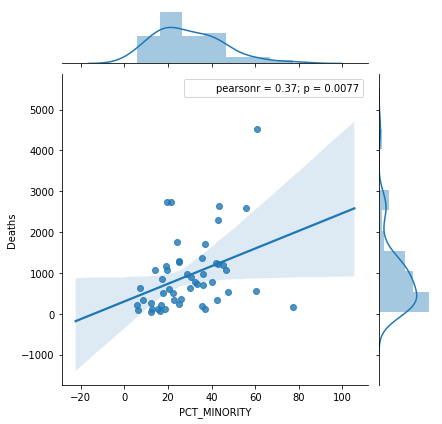

In [76]:
# Regress state percentage minority on deaths via opioid overdoses
#Decent correlation
sns.jointplot(combined['PCT_MINORITY'], combined['Deaths'], kind='reg', stat_func=pearsonr)

/optnfs/el7/jupyterhub/envs/Psych81.09/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



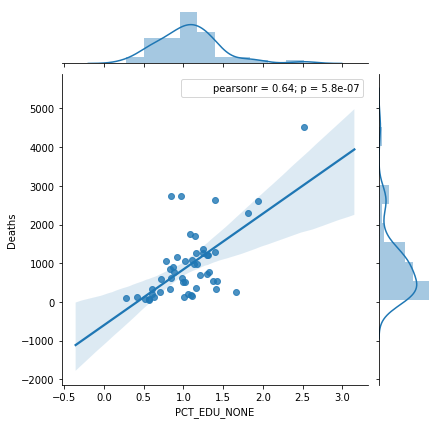

In [77]:
# Look at Deaths compared to the percentage of people in states with no education
#Significant relationship
sns.jointplot(combined['PCT_EDU_NONE'], combined['Deaths'], kind='reg', stat_func=pearsonr)

In [78]:
latlong = pd.read_csv('statelatlong.csv')
combined1 = pd.merge(combined, latlong, on='state')

combined1.head()

,OBJECTID,STATE,state,STATE_NAME,AREALAND,AREAWATER,TOTALPOP,POP_DEN,NUM_MINORITY,PCT_MINORITY,...,EUROPE,ASIA,AFRICA,OCEANIA,AMERICAS,State,Population,Deaths,latitude,longitude
0,1,2,AK,Alaska,1.480000e+12,2.450000e+11,728300,1.276284,270016,37.074832,...,8568.0,28025.0,2132.0,1493.0,11455.0,Alaska,735132.0,124.0,63.588753,-154.493062
1,2,4,AZ,Arizona,2.940000e+11,1.027791e+09,6561516,57.762832,2826663,43.079419,...,82850.0,159515.0,23987.0,4216.0,613079.0,Arizona,6626624.0,1211.0,34.048928,-111.093731
2,3,8,CO,Colorado,2.680000e+11,1.176085e+09,5197580,50.149414,1592381,30.636970,...,71051.0,112788.0,28568.0,3949.0,290847.0,Colorado,5268367.0,899.0,39.550051,-105.782067
3,4,9,CT,Connecticut,1.254240e+10,1.814979e+09,3592053,741.798768,1083693,30.169182,...,131473.0,116064.0,19717.0,1372.0,221820.0,Connecticut,3596080.0,623.0,41.603221,-73.087749
4,6,13,GA,Georgia,1.490000e+11,4.947080e+09,9907756,172.268399,4459039,45.005539,...,89614.0,266235.0,79119.0,2810.0,524958.0,Georgia,9992167.0,1206.0,32.157435,-82.907123


In [79]:
# map - colors represent percentage minority and size represents the number of deaths

mapbox_token = "pk.eyJ1Ijoianh6aG91MTkiLCJhIjoiY2p1a2xzYnB4MGl3ZjN5bXF1Z3FlZjdkMCJ9.MDXF150-61nXHGwAT52EWw"
px.set_mapbox_access_token(mapbox_token)

# color can later be replaced by anything, or can just take it out
px.scatter_mapbox(combined1, lat="latitude", lon="longitude", color="PCT_MINORITY", size='Deaths', color_continuous_scale=px.colors.cyclical.IceFire, size_max=40, zoom=10)

In [80]:
# map - colors represent percentage education = none and size represents the number of deaths

mapbox_token = "pk.eyJ1Ijoianh6aG91MTkiLCJhIjoiY2p1a2xzYnB4MGl3ZjN5bXF1Z3FlZjdkMCJ9.MDXF150-61nXHGwAT52EWw"
px.set_mapbox_access_token(mapbox_token)

# color can later be replaced by anything, or can just take it out
px.scatter_mapbox(combined1, lat="latitude", lon="longitude", color="PCT_EDU_NONE", size='Deaths', color_continuous_scale=px.colors.cyclical.IceFire, size_max=40, zoom=10)